In [1]:
import numpy as np; print('numpy:', np.__version__)
import scipy as sp; print('scipy:', sp.__version__)
import matplotlib as mpl; print('matplotlib:', mpl.__version__)
from matplotlib import pyplot as plt
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = plt.rcParams['axes.linewidth']
plt.rcParams['ytick.major.width'] = plt.rcParams['axes.linewidth']
plt.rcParams['figure.figsize'] = (5.8, 4.1)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 12

numpy: 1.23.5
scipy: 1.9.3
matplotlib: 3.6.2


lyapnov c_array = [0.00045878267597491577, 0.00047026348432063715]
lyapnov c_gmean = 0.0004644876098992411
error doubling time = 1492.2834663131405
predictability time = 2152.9099564505605


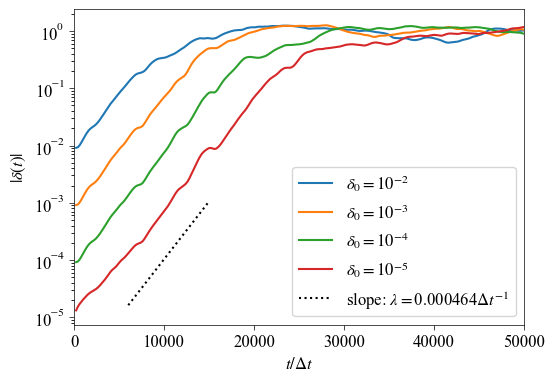

In [12]:
## purtubulated

def ly_plot(con='', *, steps_per_fout=1, lt=[10000,20000], l0=1e-6, xlim=[0,]):
    # time
    fig, ax = plt.subplots(dpi=100)
    
    # cal
    ltt = np.array(lt) / steps_per_fout # lyapnov range, hand tune by using time [LBM steps]
    lt0 = int(ltt[0])
    lt1 = int(ltt[1])
    ly = []
    for i in [2, 3, 4, 5]:
        try:
            rmse = np.loadtxt('bindiff/test/test_cal_%s_eps1e-%d.csv'%(con, i), delimiter=',')
            rmse_t = rmse[:, 1] # rmse[t0:t1, 1]
            rmse_t_x = np.arange(len(rmse_t)) * steps_per_fout
            ax.plot(rmse_t_x[1:], rmse_t[1:], label='$\delta_0=10^{-%d}$'%i)
            if i >= 4:
                ly.append( np.log(rmse_t[lt1]/rmse_t[lt0]) / (lt1 - lt0) / steps_per_fout )
        except IOError:
            pass
    
    print('lyapnov c_array =', ly)
    from scipy.stats import gmean
    lye = gmean(ly, axis=None)
    print('lyapnov c_gmean =', lye)
    print('error doubling time =', np.log(2) / lye)
    print('predictability time =', 1/lye)
    
    ly_xx = np.array([lt0, lt1]) * steps_per_fout
    ly_yy = l0 * np.exp(lye*ly_xx)
    ax.plot(ly_xx, ly_yy, ls=':', color='k', label=fr'slope: $\lambda=${lye:.3g}' r'$\Delta t^{-1}$')
    
    # labels
    ax.set_ylabel(r'$|\delta(t)|$')
    ax.set_xlabel(r'$t/\Delta t$')
    ax.set_yscale('log')
    ax.set_xlim(*xlim)
    #ax.set_ylim(1e-10, 10)
    ax.legend()
    #ax.set_title(con)
    
    plt.savefig(f'bindiff/test/lyap_errhist_{con}.pdf', bbox_inches='tight')
    plt.savefig(f'lyap_errhist_{con}.pdf', bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
    
#ly_plot('k8_nx128_wata97force_friction_nu0_les', steps_per_fout=10, lt=[1000, 10000], l0=.3e-5)
#ly_plot('k8_nx128_wata97force_friction_nu1em4_les', steps_per_fout=10, lt=[1000, 10000], l0=.3e-5)
#ly_plot('k8_nx128_wata97force_friction_nu00025_noles', steps_per_fout=10)
#ly_plot('k8_nx128_wata97force_friction_nu00025_les', steps_per_fout=10)
#ly_plot('k8_nx128_wata97force_friction_nu1em7_les', steps_per_fout=10, lt=[1000, 10000], l0=.3e-5)
ly_plot('prf2023', steps_per_fout=200, lt=[6000, 15000], l0=.1e-5, xlim=[0,50000])